In [20]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.applications import VGG16
from keras.optimizers import Adam
import matplotlib.pyplot as plt
from keras.preprocessing import image

In [7]:
train_dir = 'data/dogs_vs_cats/train'

val_dir = 'data/dogs_vs_cats/val'

test_dir = 'data/dogs_vs_cats/test'


img_width, img_height = 150, 150

input_shape = (img_width, img_height, 3)

epochs = 10
# Размер мини-выборки
batch_size = 16

nb_train_samples = 17500

nb_validation_samples = 3750

nb_test_samples = 3750

### Создаем генератор изображений
Генератор изображений создается на основе класса ImageDataGenerator. Генератор делит значения всех пикселов изображения на 255.

In [9]:
ImageDataGenerator?

In [16]:
train_datagen = ImageDataGenerator(rescale=1. / 255,
                                 rotation_range=40,
                                 width_shift_range=0.2,
                                 height_shift_range=0.2,
                                 zoom_range=0.2,
                                 horizontal_flip=True,
                                 fill_mode='nearest')

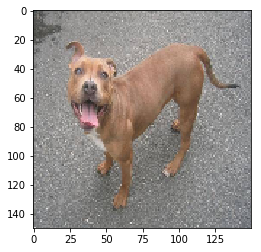

In [24]:
image_file_name = train_dir + '/dogs/dog.14.jpg'
img = image.load_img(image_file_name, target_size=(150, 150))
plt.imshow(img);

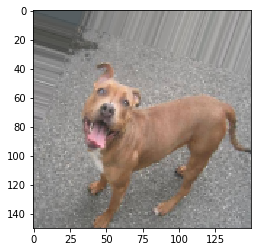

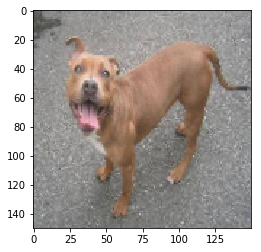

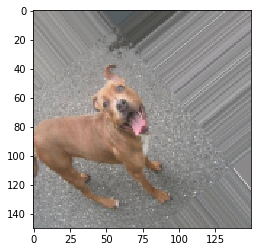

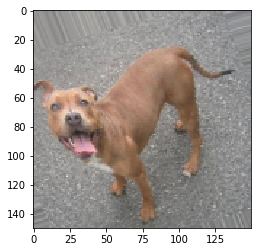

In [25]:
x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)
i = 0
for batch in train_datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
plt.show()

In [26]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 17500 images belonging to 2 classes.


In [28]:
test_datagen = ImageDataGenerator(rescale=1. / 255)

In [29]:
val_generator = test_datagen.flow_from_directory(
    val_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 3750 images belonging to 2 classes.
